In [49]:
dat = read.csv('crime_v2.csv')
library('ggplot2')
library('effsize')
library('dplyr')
library('RColorBrewer')
library('corrplot')
library('cowplot')
#library('stargazer')
options(repr.plot.width=6, repr.plot.height=4)

## Crime Rate EDA

[1] 97

[1] "numeric"

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

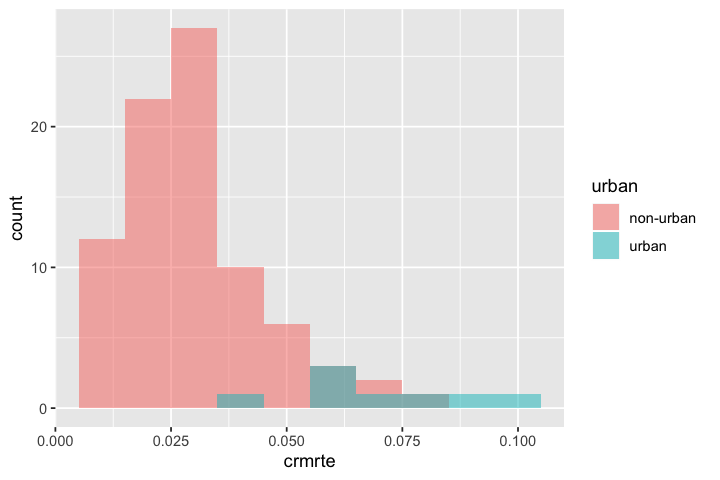

[1] "Crimes committed per person"

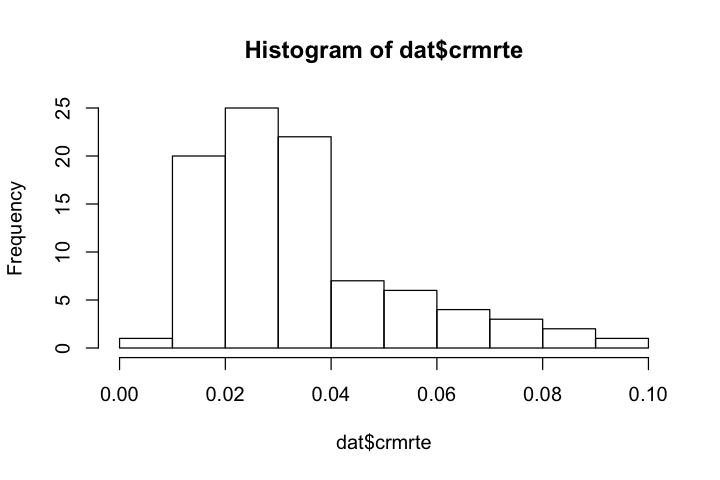

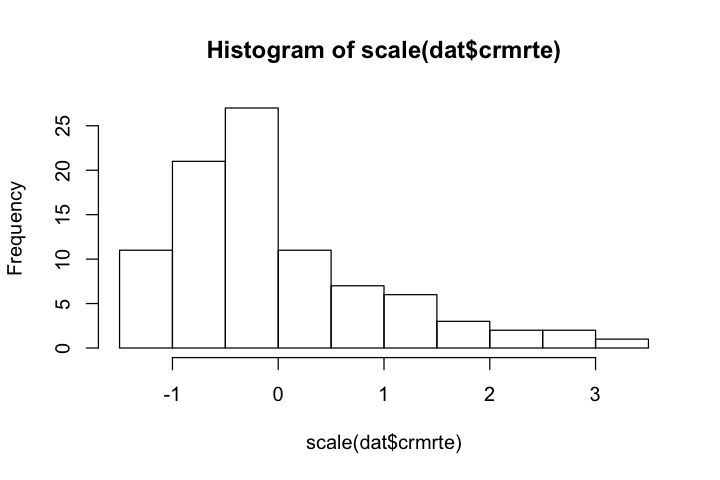

In [61]:
nrow(dat)
class(dat$crmrte)
dat$urban <- recode_factor(dat$urban, '0' = 'non-urban', '1' = 'urban')
#dat$urban <- as.factor(dat$urban)
ggplot(dat, aes(x=crmrte, fill=urban)) + geom_histogram(binwidth = .01, alpha= 0.5, position='identity') 
hist(dat$crmrte)
"Crimes committed per person"
hist(scale(dat$crmrte))

# non parametric test to determine if they are different?

## crimejustice = prbconv / prbarr = conv/arrest * arrest/crime = convictions/crime

Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

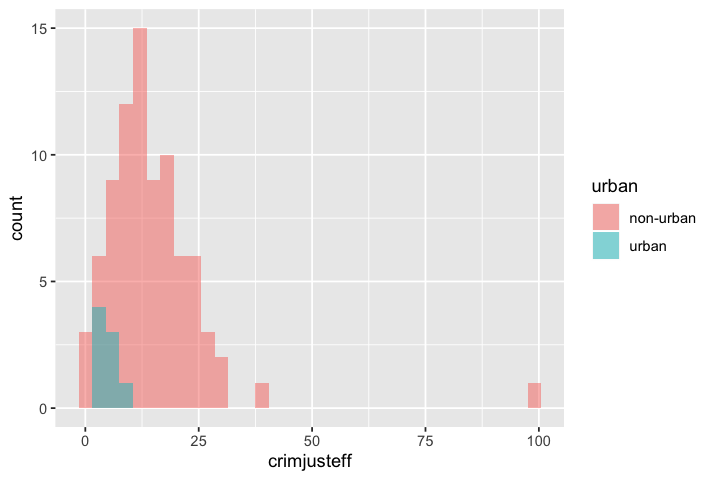

In [64]:
dat$prbconv <- as.numeric(dat$prbconv)
dat$crimjusteff <- dat$prbconv * dat$prbarr
ggplot(dat, aes(x=crimjusteff, fill=urban)) + geom_histogram(binwidth= 3,alpha= 0.5, position='identity')


## Probablity of arrest

[1] "numeric"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

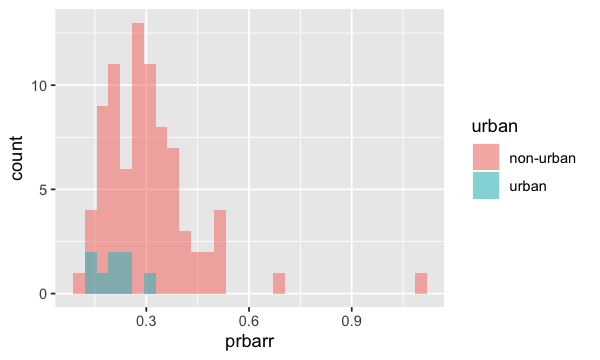

[1] "Crimes committed per person"

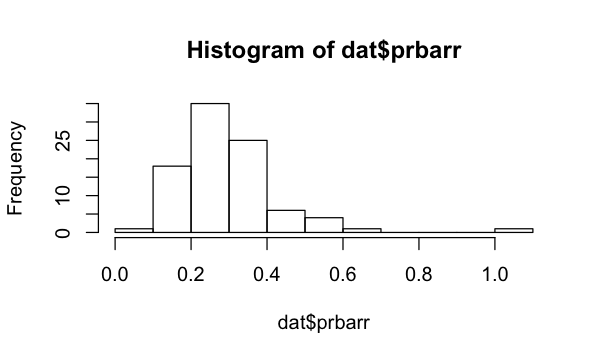

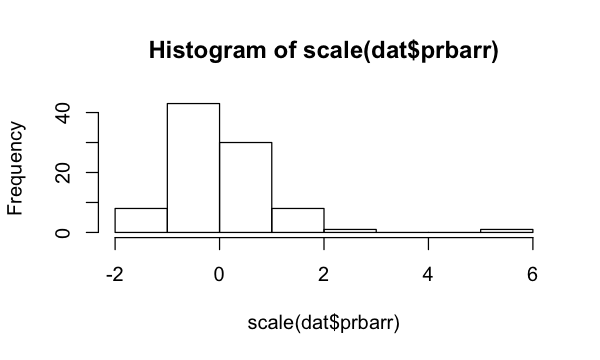

In [14]:
class(dat$prbarr)
ggplot(dat, aes(x=prbarr, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')
hist(dat$prbarr)
"Crimes committed per person"
hist(scale(dat$prbarr))

In [3]:
dat[dat$prbarr > .8,]
nrow(dat)
# What to do about impossible value?  remove entire row?
#dat <- dat[dat$prbarr < 1,]
nrow(dat)

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
51,115,87,0.0055332,1.09091,1.5,0.5,20.7,0.00905433,0.3858093,28.1931,⋯,503.2351,217.4908,342.4658,245.2061,448.42,442.2,340.39,386.12,0.1,0.07253495
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 97

[1] 97

In [4]:
dat$prbconv <- as.numeric(dat$prbconv)  #listed as factor originally
x <-cor(dat, use = "complete.obs")
x <- x['prbarr',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbarr      polpc        mix     crmrte    density       wcon       wfed 
1.00000000 0.42644092 0.41321102 0.39332974 0.30138532 0.25179698 0.20866952 
     urban    pctymle     avgsen       wfir       west    central       wsta 
0.20766796 0.18026919 0.18001477 0.17376209 0.16673500 0.16646486 0.16122998 
      wmfg      taxpc       wser       wtrd    prbconv       wtuc   pctmin80 
0.15187629 0.13501969 0.13152692 0.10183886 0.07539293 0.07212877 0.05141445 
   prbpris       wloc     county 
0.04544189 0.02727041 0.01935153

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

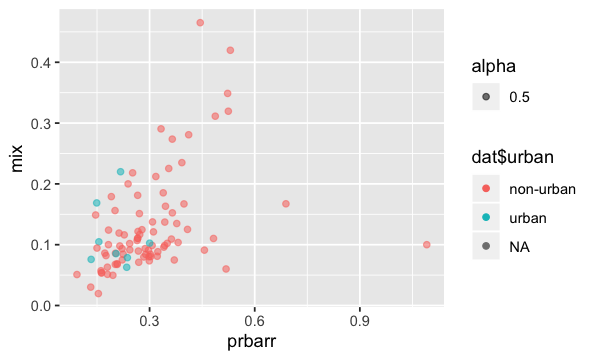

Warning message:
“Removed 6 rows containing missing values (geom_point).”

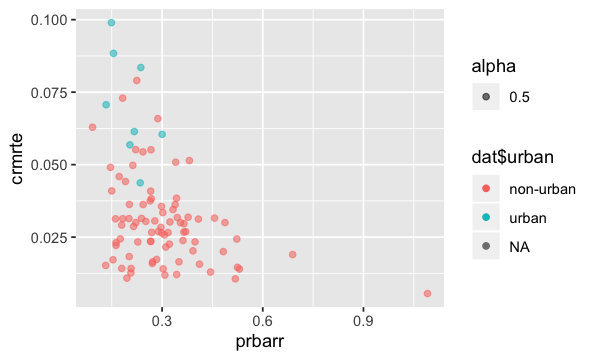

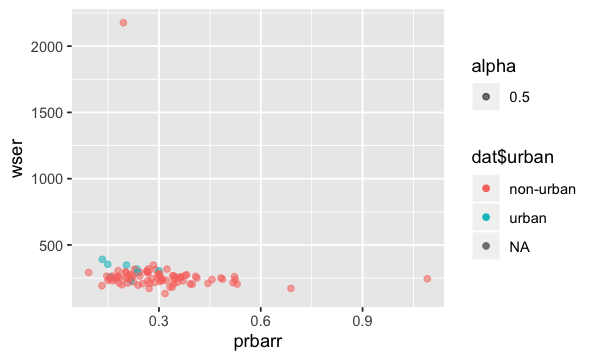

In [19]:
scatterp <- function(x, ylist){
    for (i in range(ylist)) {
        plot <- ggplot(dat, aes(x, i)) + geom_point()
        print(i)
        print(plot)
    }
}
#scatterp(dat$prbarr,c(dat$crmrte,dat$polpc))
ggplot(dat, aes(prbarr, mix)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbarr, crmrte)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbarr, wser)) + geom_point(aes(color=dat$urban, alpha=.5))



Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

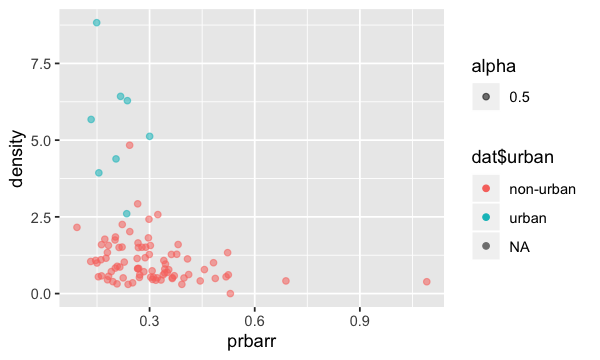

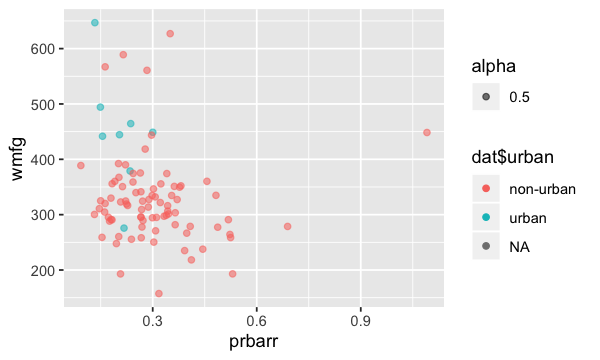

In [20]:
ggplot(dat, aes(prbarr, density)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbarr, wmfg)) + geom_point(aes(color=dat$urban, alpha=.5))

## Probability of conviction

[1] "numeric"

[1] 63 89 13 62 52  3 59 78 42 86 23 37 38 27 58 20 33 82 48 47 77 30 12  4  7
[26] 75 73 55 50  5 11 76 10 64 17  6 49 66 65 34 71 69 72 87 68 32 29 79 61  8
[51] 90 80 26  9 43 88 35 56 14 53 84 15 40 18 24 41 83 28 60 67 45 54 57 36 51
[76] 19 74 81 21 39 22 25 31 92 44 16 46 70 70 91 85  1  1  1  1  1  2

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


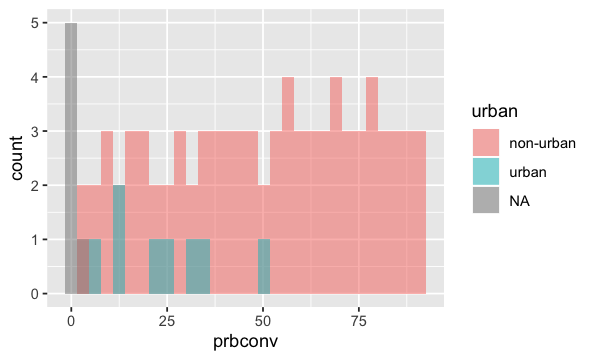

[1] "Conviction rate"

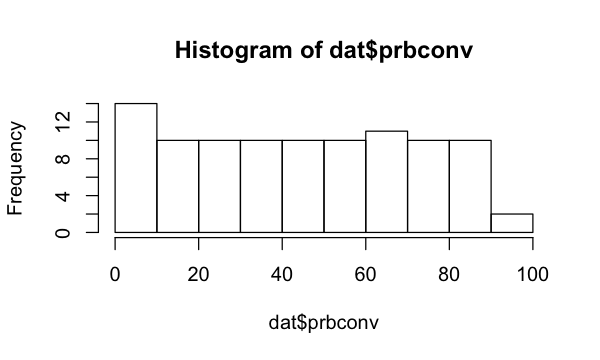

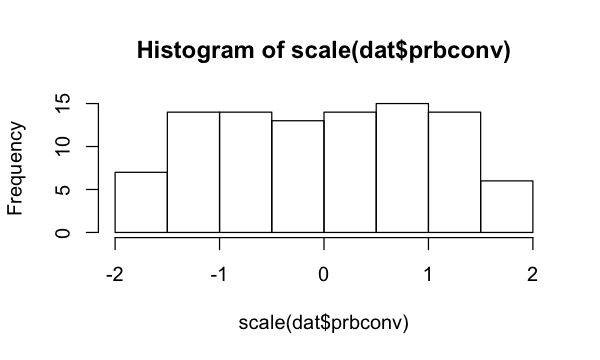

In [21]:
class(dat$prbconv)
dat$prbconv
dat$prbconv <- as.numeric(dat$prbconv)  #listed as factor originally
ggplot(dat, aes(x=prbconv, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')


hist(dat$prbconv)
"Conviction rate"
hist(scale(dat$prbconv))

In [41]:
x <-cor(dat, use = "complete.obs")
x <- x['prbconv',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbconv     crmrte        mix    density      urban      polpc      taxpc 
1.00000000 0.38159995 0.33110802 0.28798516 0.27988463 0.27024590 0.27006672 
    prbarr    pctymle       wser       wtrd   pctmin80       wsta     county 
0.23347346 0.22129066 0.17537877 0.13590190 0.11724183 0.10791240 0.07259169 
      wcon       wfir     avgsen    central       wmfg       wfed    prbpris 
0.05445264 0.04432860 0.04377468 0.03963446 0.03917207 0.01925566 0.01786566 
      west       wtuc       wloc 
0.01620872 0.01547152 0.01368428

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

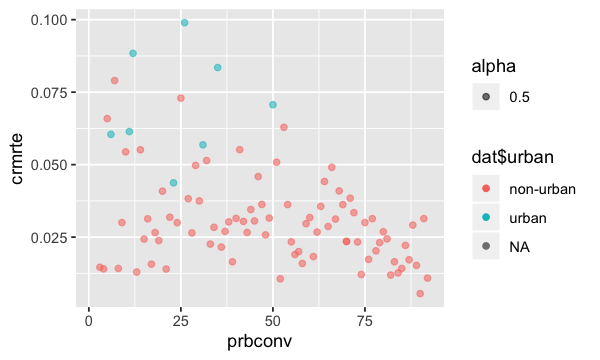

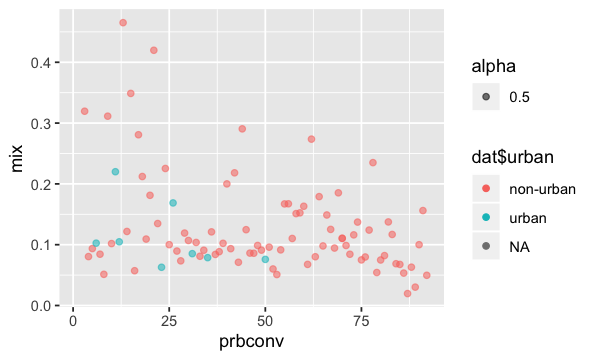

In [23]:
ggplot(dat, aes(prbconv, crmrte)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbconv, mix)) + geom_point(aes(color=dat$urban, alpha=.5))

Warning message:
“Removed 6 rows containing missing values (geom_point).”

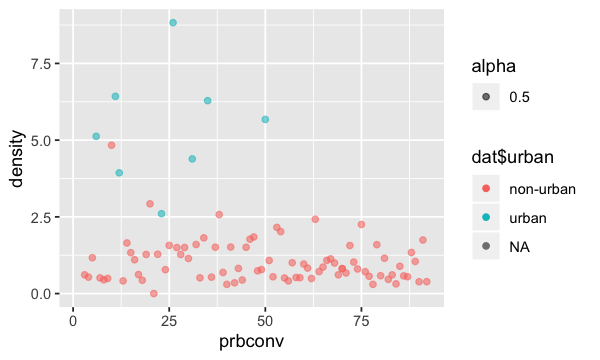

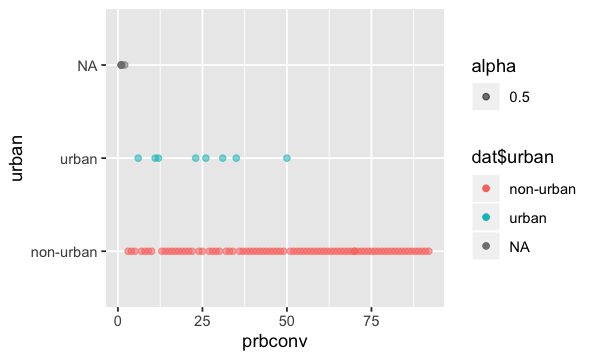

In [24]:
ggplot(dat, aes(prbconv, density)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbconv, urban)) + geom_point(aes(color=dat$urban, alpha=.5))

## Probability of Prison

[1] "numeric"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

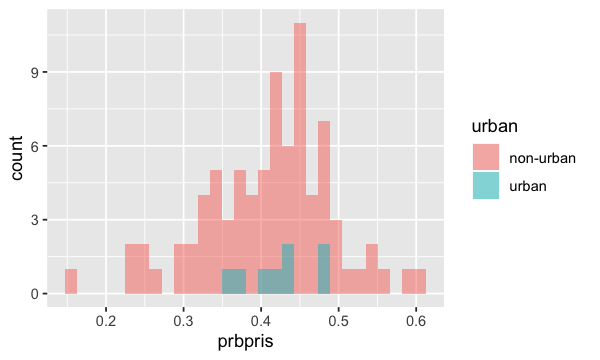

[1] "Probability of Prison "

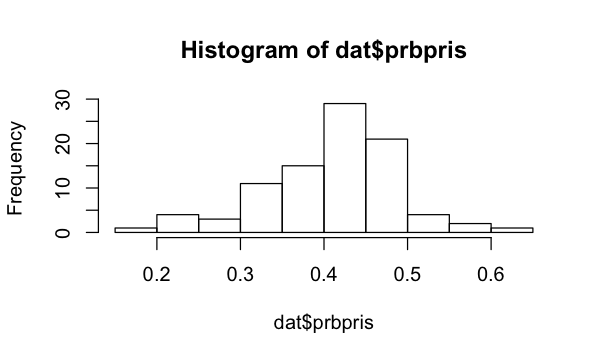

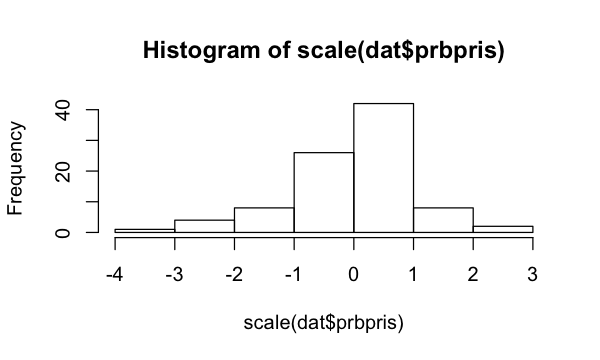

In [22]:
class(dat$prbpris)
ggplot(dat, aes(x=prbpris, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')
hist(dat$prbpris)
"Probability of Prison "
hist(scale(dat$prbpris))

In [46]:
x <-cor(dat, use = "complete.obs")
x <- x['prbpris',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

prbpris     central      avgsen        wtrd    pctmin80         mix 
1.000000000 0.173973012 0.159759067 0.138910283 0.123330673 0.121502781 
       wtuc        wfed     density       taxpc     pctymle      county 
0.112595914 0.086368982 0.085996777 0.084802384 0.077682941 0.076106862 
      polpc      crmrte        west       urban        wloc        wser 
0.075306665 0.066782246 0.063707025 0.054036104 0.052590798 0.040303647 
       wcon      prbarr        wfir        wsta     prbconv        wmfg 
0.039152570 0.034755696 0.029575428 0.027228519 0.017865662 0.007581677

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

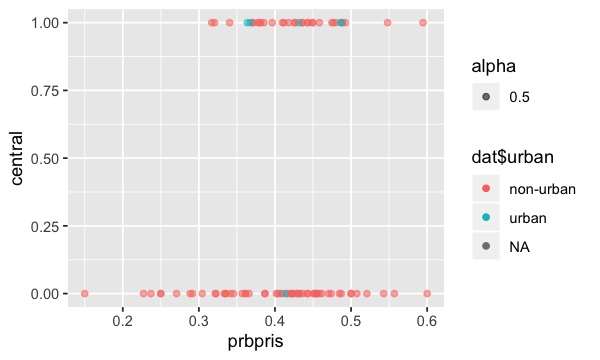

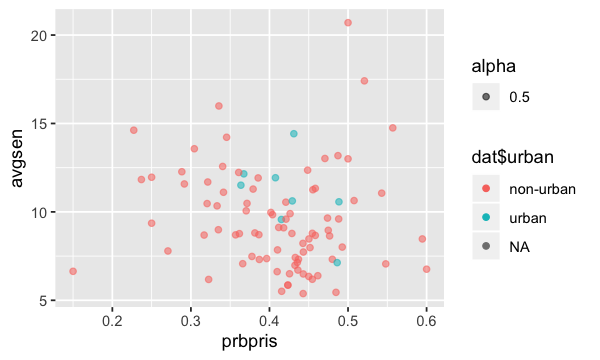

In [25]:
ggplot(dat, aes(prbpris, central)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(prbpris, avgsen)) + geom_point(aes(color=dat$urban, alpha=.5))

## Average prison sentence in days

[1] "numeric"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

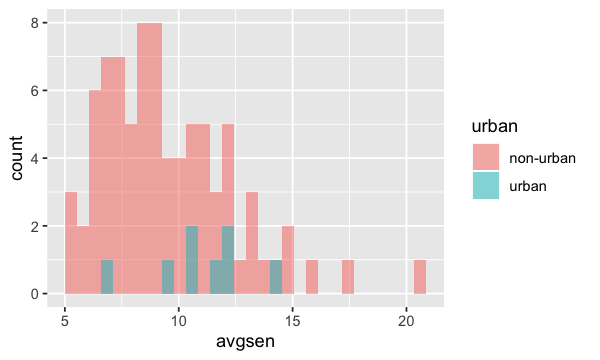

[1] "Average sentence in days"

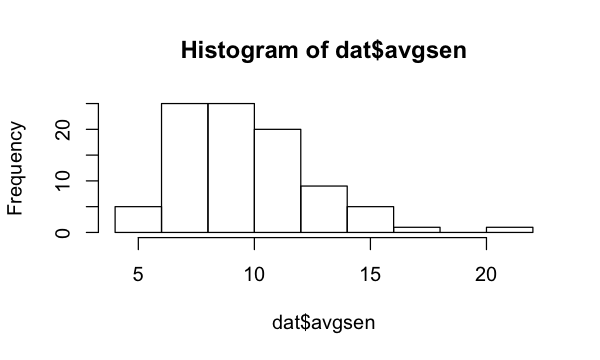

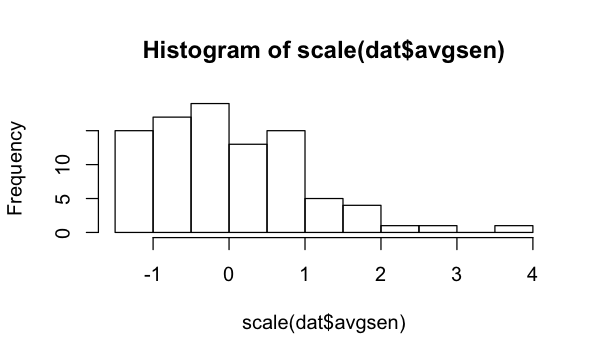

In [27]:
class(dat$avgsen)
ggplot(dat, aes(x=avgsen, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')

hist(dat$avgsen)
"Average sentence in days"
hist(scale(dat$avgsen))

In [49]:
x <-cor(dat, use = "complete.obs")
x <- x['avgsen',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

avgsen        polpc         wtuc        urban         wsta         wfir 
1.0000000000 0.2959305749 0.1801614623 0.1761762136 0.1659626168 0.1615687463 
     prbpris         wfed         wser        taxpc          mix      central 
0.1597590674 0.1589756913 0.1586495767 0.1422287135 0.1333087148 0.1222946217 
     density      pctymle       prbarr       crmrte     pctmin80         wtrd 
0.1192868210 0.1047377058 0.1024219081 0.1022436059 0.0934615040 0.0801960060 
        wmfg         wcon      prbconv         wloc         west       county 
0.0664454211 0.0495134300 0.0437746787 0.0119111195 0.0095857422 0.0008751455

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

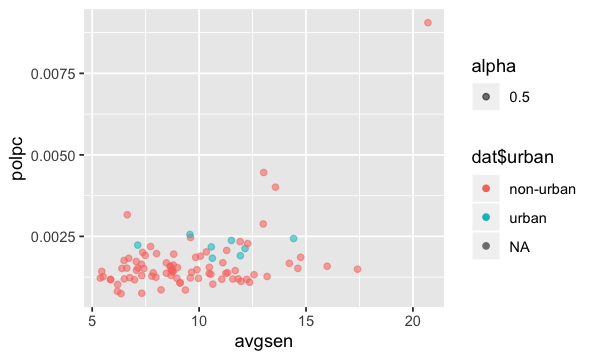

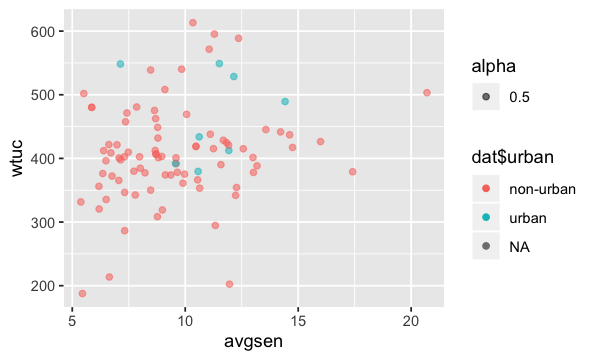

In [26]:
ggplot(dat, aes(avgsen, polpc)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(avgsen, wtuc)) + geom_point(aes(color=dat$urban, alpha=.5))

## Police per capita

[1] "numeric"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”


	Welch Two Sample t-test

data:  dat$polpc by dat$urban
t = -3.8622, df = 38.308, p-value = 0.0004204
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.0008410654 -0.0002626815
sample estimates:
mean in group non-urban     mean in group urban 
            0.001653643             0.002205516 


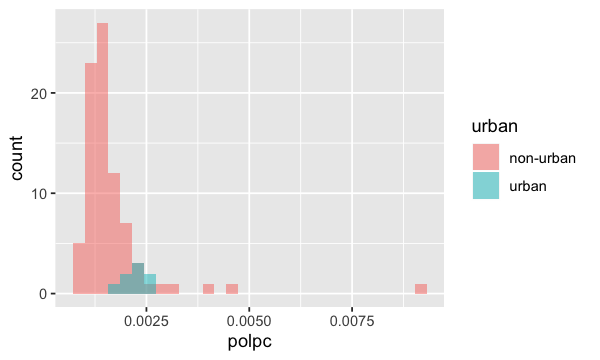

[1] "Police per capita"

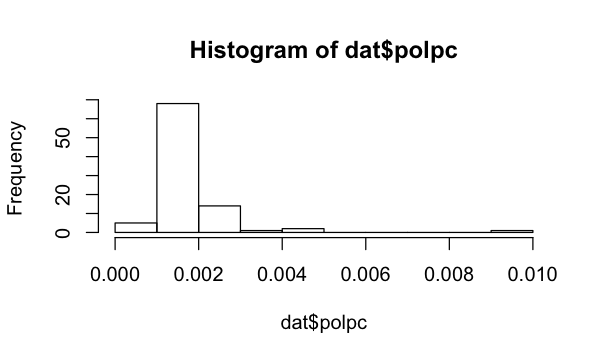

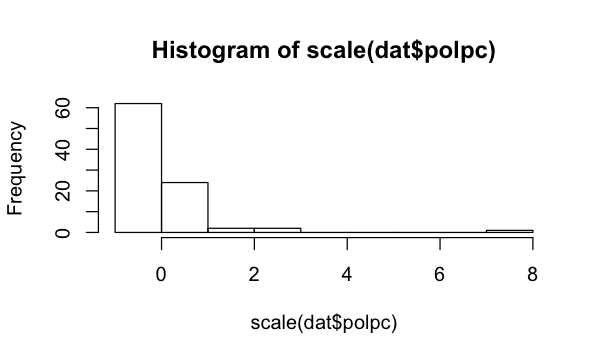

In [30]:
class(dat$polpc)
ggplot(dat, aes(x=polpc, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')
t.test(dat$polpc ~ dat$urban)
hist(dat$polpc)
"Police per capita"
hist(scale(dat$polpc))

In [52]:
x <-cor(dat, use = "complete.obs")
x <- x['polpc',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

polpc       taxpc      crmrte     density       urban      avgsen 
1.000000000 0.566832758 0.484894133 0.357452492 0.301722169 0.295930575 
       wmfg     prbconv        wloc        wfed        wfir        wcon 
0.271253835 0.270245901 0.267071229 0.260574195 0.257432617 0.197483460 
       wtrd     pctymle        wsta      prbarr        wtuc         mix 
0.158580898 0.151096133 0.138242934 0.124181090 0.110505188 0.089834340 
     county     prbpris    pctmin80     central        west        wser 
0.078538915 0.075306665 0.068689165 0.037720837 0.007687079 0.007544371

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

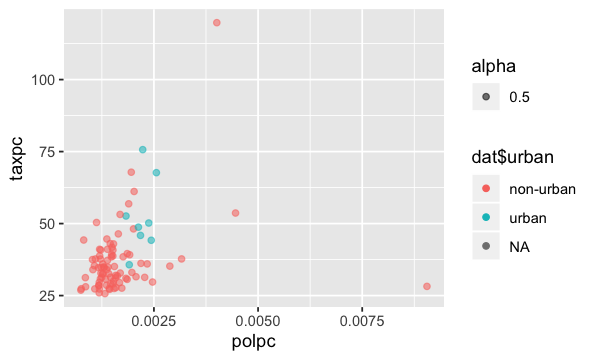

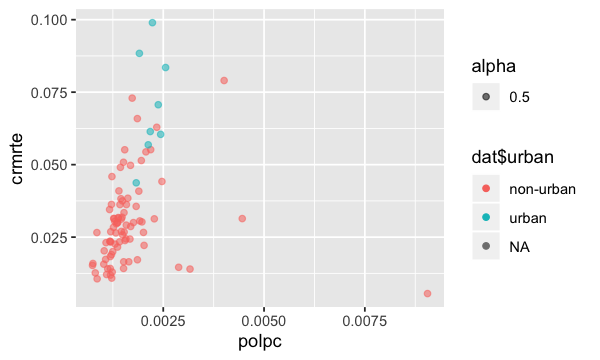

In [31]:
ggplot(dat, aes(polpc, taxpc)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(polpc, crmrte)) + geom_point(aes(color=dat$urban, alpha=.5))

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

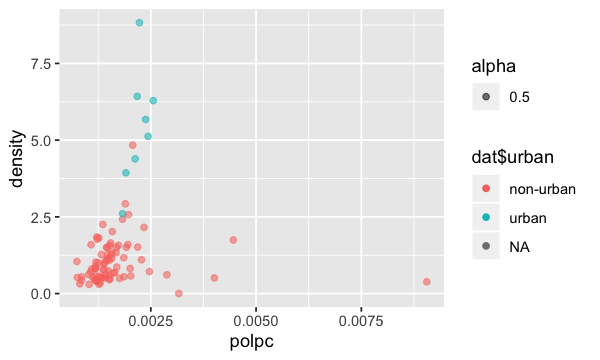

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
25,55,87,0.0790163,0.224628,7,0.304348,13.57,0.00400962,0.5115089,119.76145,⋯,445.2762,189.7436,284.5933,221.3903,319.21,338.91,361.68,326.08,0.08437271,0.07613807
51,115,87,0.0055332,1.090910,90,0.500000,20.70,0.00905433,0.3858093,28.19310,⋯,503.2351,217.4908,342.4658,245.2061,448.42,442.20,340.39,386.12,0.10000000,0.07253495
90,195,87,0.0313973,0.201397,91,0.470588,13.02,0.00445923,1.7459893,53.66693,⋯,377.9356,246.0614,411.4330,296.8684,392.27,480.79,303.11,337.28,0.15612382,0.07945071
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.1,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.2,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.4,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
NA.5,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


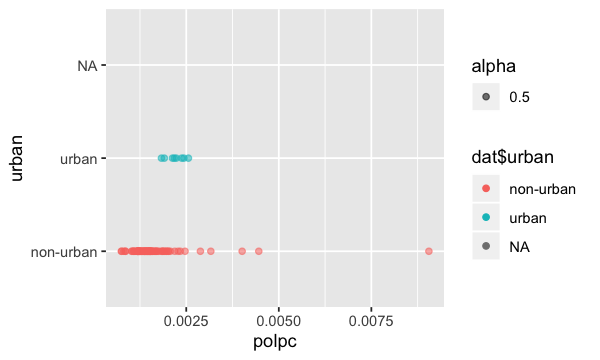

In [32]:
ggplot(dat, aes(polpc, density)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(polpc, urban)) + geom_point(aes(color=dat$urban, alpha=.5))
dat[dat$polpc > .0035,]

## Mix of crimes

[1] "numeric"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 6 rows containing non-finite values (stat_bin).”

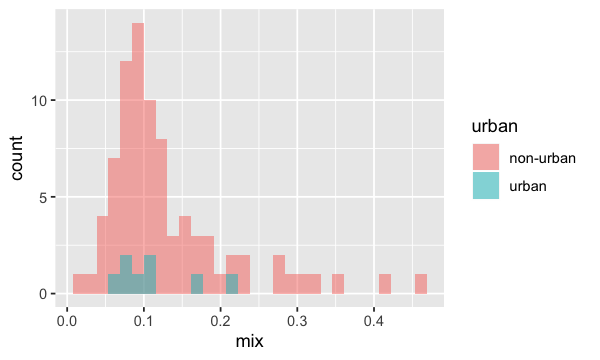

[1] "Types of crime, ratio of face to face vs other"

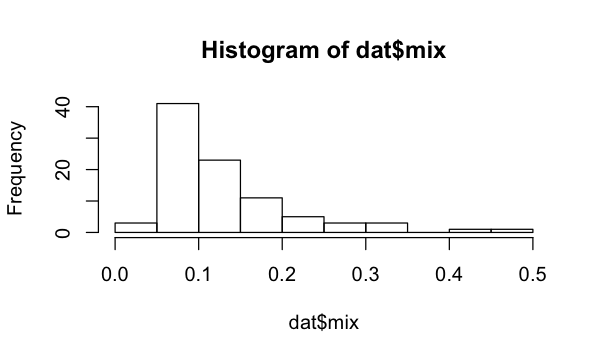

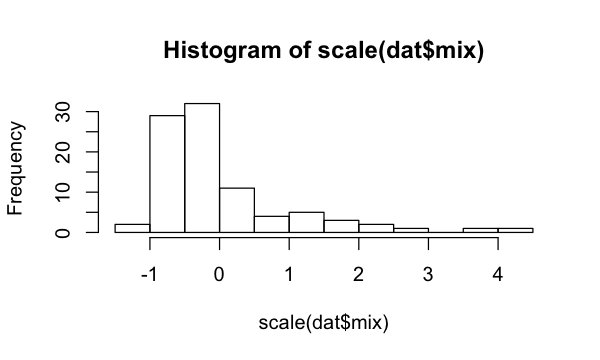

In [33]:
class(dat$mix)
ggplot(dat, aes(x=mix, fill=urban)) + geom_histogram(alpha= 0.5, position='identity')
hist(dat$mix)
"Types of crime, ratio of face to face vs other"
hist(scale(dat$mix))

In [57]:
x <-cor(dat, use = "complete.obs")
x <- x['mix',]
sort(abs(x), decreasing=T)

Warning message in cor(dat, use = "complete.obs"):
“the standard deviation is zero”

mix      prbarr        wmfg     prbconv        wfed        wloc 
1.000000000 0.554396972 0.340768463 0.331108023 0.313144183 0.254003029 
       wtuc        wfir        wcon    pctmin80        wser     density 
0.251972035 0.212337395 0.206201484 0.199341881 0.174484919 0.138911963 
     crmrte      avgsen        wtrd     prbpris     pctymle     central 
0.138140739 0.133308715 0.127383192 0.121502781 0.094317186 0.093266711 
      polpc        wsta       urban      county       taxpc        west 
0.089834340 0.076166476 0.064647844 0.063273443 0.044748337 0.005320382

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

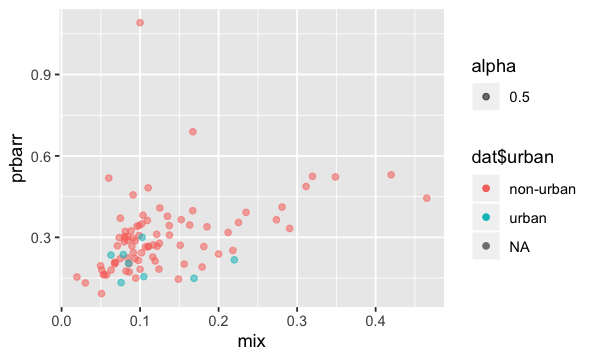

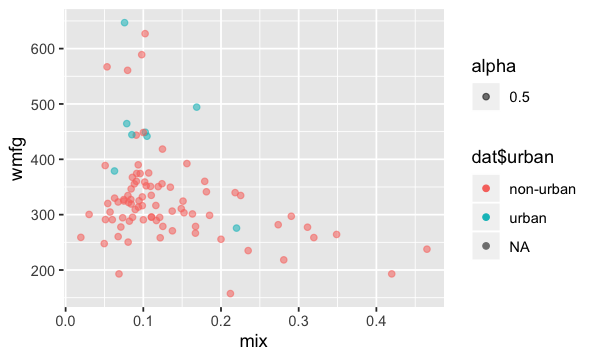

In [34]:
ggplot(dat, aes(mix, prbarr)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(mix, wmfg)) + geom_point(aes(color=dat$urban, alpha=.5))

Warning message:
“Removed 6 rows containing missing values (geom_point).”Warning message:
“Removed 6 rows containing missing values (geom_point).”

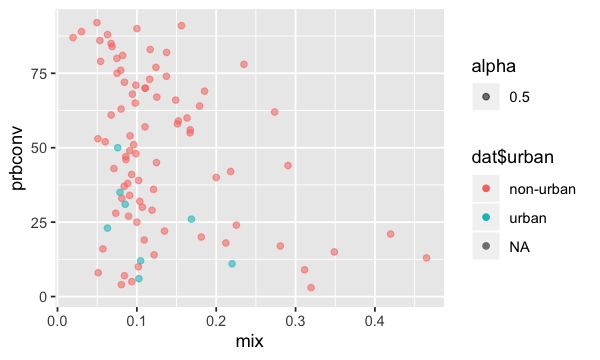

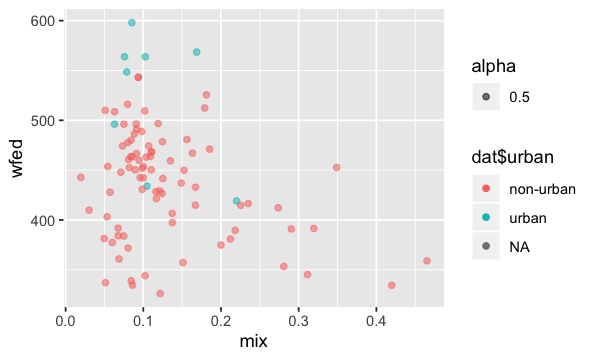

In [35]:
ggplot(dat, aes(mix, prbconv)) + geom_point(aes(color=dat$urban, alpha=.5))
ggplot(dat, aes(mix, wfed)) + geom_point(aes(color=dat$urban, alpha=.5))

In [67]:
head(dat)
nrow(dat)
#cor(dat, use = "complete.obs")
dat$prbconv <- as.numeric(dat$prbconv)

#tot_cor <- cor()

non_urban = dat[dat$urban == 'non-urban',]
non_urban <- subset(non_urban, select = -c(urban))
nonurbancor <- cor(non_urban, use = "complete.obs")

urban_ = dat[dat$urban == 'urban',]
urban_ <- subset(urban_, select = -c(urban))
urbancor <- cor(urban_, use = "complete.obs")

county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle,crimjusteff
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,87,0.0356036,0.298270,63,0.436170,6.71,0.00182786,2.4226327,30.99368,⋯,221.2701,453.1722,274.1775,334.54,477.58,292.09,311.91,0.08016878,0.07787097,18.791009
3,87,0.0152532,0.132029,89,0.450000,6.35,0.00074588,1.0463320,26.89208,⋯,196.0101,258.5650,192.3077,300.38,409.83,362.96,301.47,0.03022670,0.08260694,11.750581
5,87,0.0129603,0.444444,13,0.600000,6.76,0.00123431,0.4127659,34.81605,⋯,229.3209,305.9441,209.6972,237.65,358.98,331.53,281.37,0.46511629,0.07211538,5.777772
7,87,0.0267532,0.364760,62,0.435484,7.14,0.00152994,0.4915572,42.94759,⋯,191.1720,281.0651,256.7214,281.80,412.15,328.27,299.03,0.27362204,0.07353726,22.615121
9,87,0.0106232,0.518219,52,0.442623,8.22,0.00086018,0.5469484,28.05474,⋯,206.8215,289.3125,215.1933,290.89,377.35,367.23,342.82,0.06008584,0.07069755,26.947388
11,87,0.0146067,0.524664,3,0.500000,13.00,0.00288203,0.6113361,35.22974,⋯,187.8255,258.5650,237.1507,258.60,391.48,325.71,275.22,0.31952664,0.09891920,1.573992


[1] 97

Warning message in cor(non_urban, use = "complete.obs"):
“the standard deviation is zero”Warning message in cor(urban_, use = "complete.obs"):
“the standard deviation is zero”

In [41]:
nonurbancor

,county,year,crmrte,prbarr,prbconv,prbpris,avgsen,polpc,density,taxpc,⋯,wtuc,wtrd,wfir,wser,wmfg,wfed,wsta,wloc,mix,pctymle
county,1.00000000,NA,0.051187590,-0.03541731,0.051061468,-0.064344797,0.029294564,0.073763592,-0.023438585,-0.09151790,⋯,0.02456993,-0.02844656,0.02970660,0.14360894,-0.03969462,-0.03650116,0.114743062,0.08894561,-0.072250638,0.11314679
year,NA,1,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
crmrte,0.05118759,NA,1.000000000,-0.34612381,-0.328813295,0.008947456,-0.045302264,0.091285426,0.474393911,0.30747297,⋯,0.12222903,0.21359611,0.08863457,-0.11837443,0.11476586,0.35411012,0.079557213,0.18745381,-0.144621222,0.29134474
prbarr,-0.03541731,NA,-0.346123813,1.00000000,-0.135489578,0.055049144,0.212065545,0.478363562,-0.271217189,-0.06748390,⋯,-0.01687487,-0.01976702,-0.09972945,-0.12099684,-0.05955920,-0.14852164,-0.124999783,0.06352387,0.422332269,-0.15771805
prbconv,0.05106147,NA,-0.328813295,-0.13548958,1.000000000,0.070837071,0.090631652,0.014482420,-0.169033469,-0.23536762,⋯,0.05675979,-0.02038189,0.17375061,0.18809944,0.17051951,0.13879801,-0.041494301,0.12725954,-0.363224490,-0.21552259
prbpris,-0.06434480,NA,0.008947456,0.05504914,0.070837071,1.000000000,-0.090894862,0.041127977,0.014414334,-0.14268782,⋯,0.13809371,0.14940542,0.02788856,0.04184083,0.02455810,0.10244174,-0.024039312,0.08251316,0.098294467,-0.07250823
avgsen,0.02929456,NA,-0.045302264,0.21206555,0.090631652,-0.090894862,1.000000000,0.490211276,0.005043154,0.10670458,⋯,0.20097952,0.04096592,0.15253252,-0.16337738,0.06904227,0.09927616,0.061772997,0.10070711,-0.119966864,0.04574103
polpc,0.07376359,NA,0.091285426,0.47836356,0.014482420,0.041127977,0.490211276,1.000000000,0.036217231,0.24996781,⋯,0.13814468,0.05040695,0.14360393,-0.02738390,0.23655110,0.09562640,-0.004210675,0.35855489,0.036611289,0.04556020
density,-0.02343858,NA,0.474393911,-0.27121719,-0.169033469,0.014414334,0.005043154,0.036217231,1.000000000,-0.06732900,⋯,0.28676475,0.47554769,0.41967883,-0.01202151,0.22529549,0.55092682,0.010673601,0.36680268,-0.277182166,0.15458297
taxpc,-0.09151790,NA,0.307472969,-0.06748390,-0.235367621,-0.142687818,0.106704579,0.249967814,-0.067328999,1.00000000,⋯,0.08029426,-0.05164353,-0.09654288,0.05366092,0.13163580,-0.17078302,-0.136135411,0.08297445,-0.027913847,-0.09273962


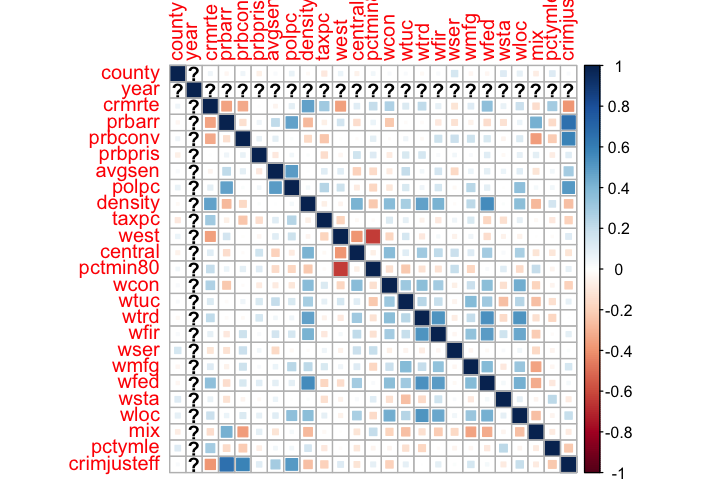

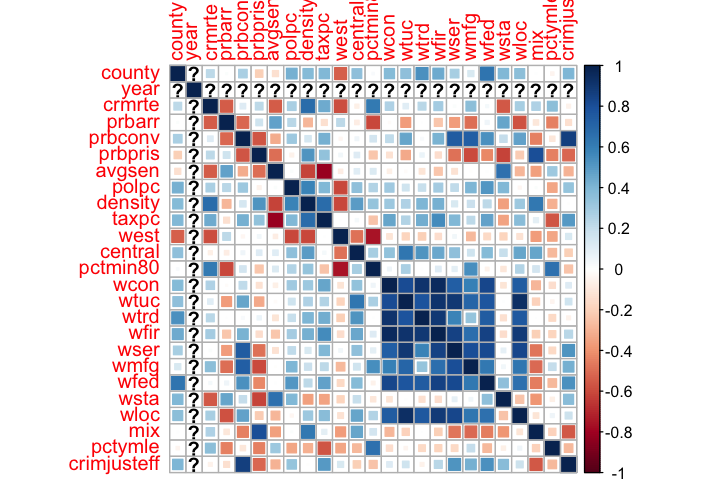

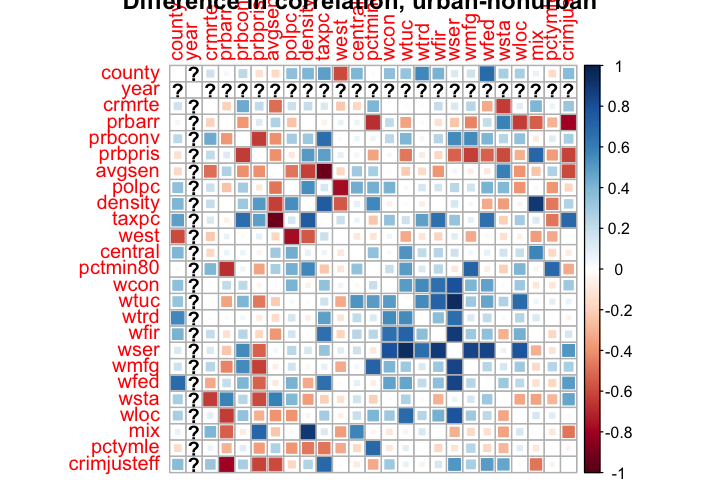

In [69]:
x1 <- corrplot(nonurbancor, method="square")
x2 <- corrplot(urbancor, method="square")
corrplot((urbancor - nonurbancor), method='square', main="Difference in correlation, urban-nonurban")